In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft
import mogptk

In [71]:
from calc_rmse import calc_rmse

In [2]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)



In [3]:
x=np.linspace(0,1,1600)

In [4]:
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]

In [5]:
# using synthesis equation to understand which frequencies are corrupted
def compute_four

SyntaxError: invalid syntax (4159716030.py, line 2)

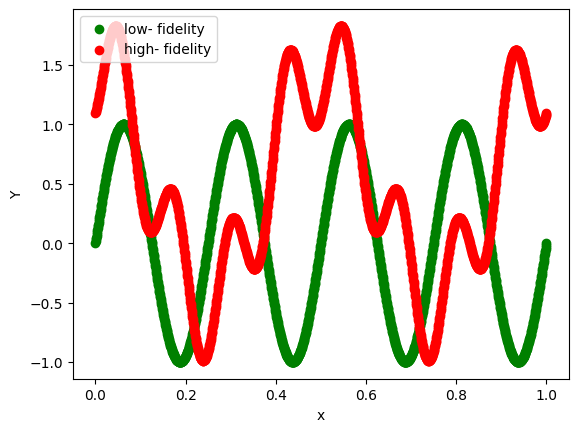

In [5]:
plt.scatter(x, points1, c="g", label="low- fidelity")
plt.scatter(x, points2, c="r", label="high- fidelity")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("Y")
#plt.show()
plt.savefig("low-high-third_func.jpeg")

In [72]:
# custom kernel + frequency input
# evaluated on the first pair of the low- and high- fidelity fuctions
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))


In [73]:
m1_real = mogptk.LoadModel("m1_r_sin")
m2_real = mogptk.LoadModel('m2_r_sin')
m3_real = mogptk.LoadModel('m3_r_sin')
m4_real = mogptk.LoadModel('m4_r_sin')
m5_real = mogptk.LoadModel('m5_r_sin')
 

m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin')
m3_im = mogptk.LoadModel('m3_i_sin')
m4_im = mogptk.LoadModel('m4_i_sin')
m5_im = mogptk.LoadModel('m5_i_sin')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)


18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library


In [74]:
first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()

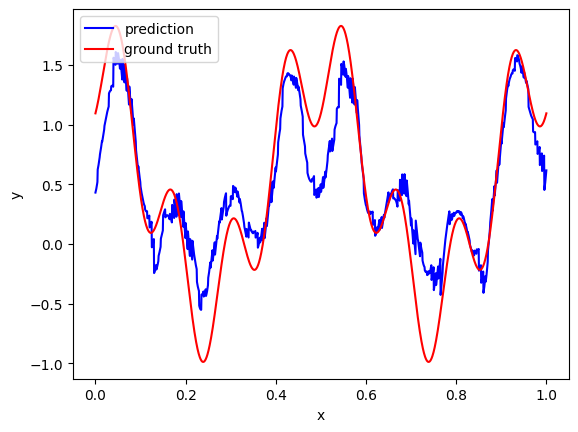

In [75]:
plt.plot(x, values_kernel, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_kernel_freq.jpeg")

#plot predictions on high fidelity

In [76]:
calc_rmse(values_kernel, np.asarray(points2))

0.3419068089739991

17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library


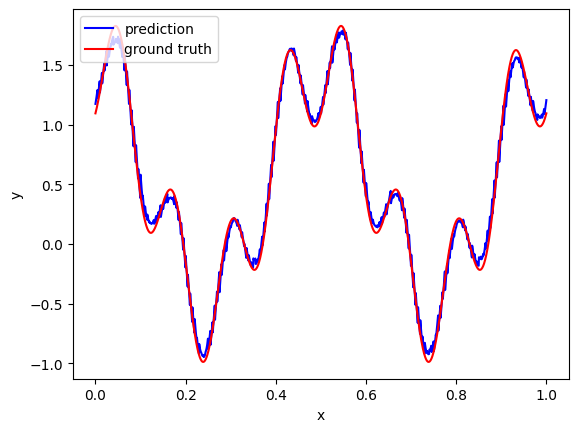

In [84]:
# sm kernel + bnse intialisation and low-fidelity frequency input


f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))


m1_real = mogptk.LoadModel("m1_r_sin_sm_bnse3")
m2_real = mogptk.LoadModel('m2_r_sin_sm_bnse3')
m3_real = mogptk.LoadModel('m3_r_sin_sm_bnse3')
m4_real = mogptk.LoadModel('m4_r_sin_sm_bnse3')
m5_real = mogptk.LoadModel('m5_r_sin_sm_bnse3')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_bnse3")
m2_im = mogptk.LoadModel('m2_i_sin_sm_bnse3')
m3_im = mogptk.LoadModel('m3_i_sin_sm_bnse3')
m4_im = mogptk.LoadModel('m4_i_sin_sm_bnse3')
m5_im = mogptk.LoadModel('m5_i_sin_sm_bnse3')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("bnse_freq.jpeg")
points_bnse=values

In [85]:
calc_rmse(values, np.asarray(points2))

0.057533917061239344

9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library
9 input dims library


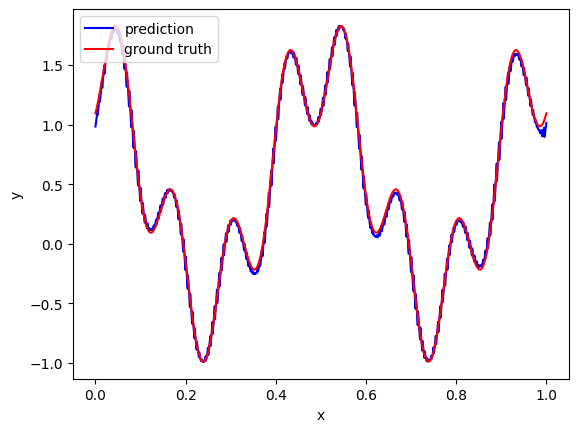

In [88]:
# sm+bnse+ no frequencies
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig_BNSE")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig_BNSE')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig_BNSE')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig_BNSE')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig_BNSE')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig_BNSE")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig_BNSE')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig_BNSE')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig_BNSE')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig_BNSE')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("bnse_no_freq.jpeg")
#plt.plot(x, points_bnse, c="g")

In [89]:
calc_rmse(values, np.asarray(points2))

0.0379678216577966

16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
17 input dims library
17 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library


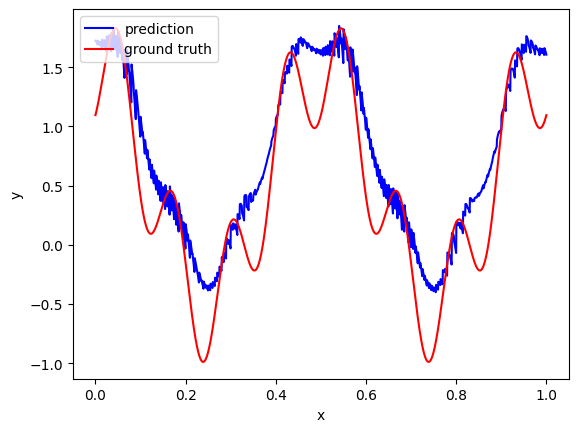

In [77]:
#sm + frequencies, no bnse
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))


m1_real = mogptk.LoadModel("m1_r_sin_sm")
m2_real = mogptk.LoadModel('m2_r_sin_sm')
m3_real = mogptk.LoadModel('m3_r_sin_sm')
m4_real = mogptk.LoadModel('m4_r_sin_sm')
m5_real = mogptk.LoadModel('m5_r_sin_sm')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm")
m2_im = mogptk.LoadModel('m2_i_sin_sm')
m3_im = mogptk.LoadModel('m3_i_sin_sm')
m4_im = mogptk.LoadModel('m4_i_sin_sm')
m5_im = mogptk.LoadModel('m5_i_sin_sm')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b",label= "prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_freq.jpeg")

In [78]:
calc_rmse(values, np.asarray(points2))

0.3933114494102111

8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
9 input dims library
9 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library


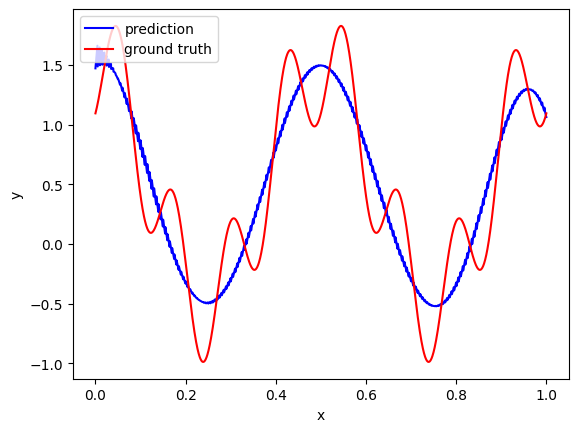

In [79]:
# sm with no frequencies
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b",label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_no_freq.jpeg")
#plt.plot(x, values_kernel, c="g")

In [81]:
calc_rmse(values, np.asarray(points2))

0.34527028921095365

8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library


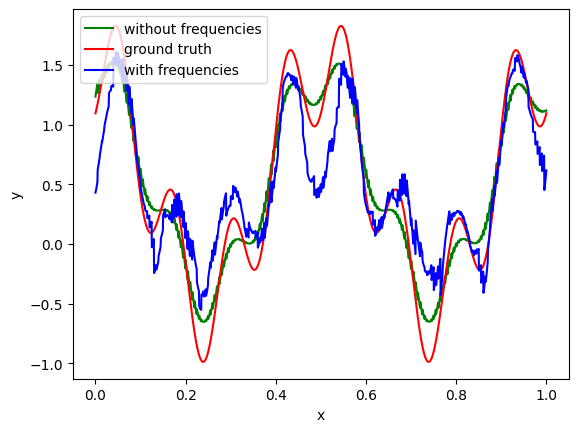

In [82]:
#custom kernel with no frequencies
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_orig")
m2_real = mogptk.LoadModel('m2_r_sin_orig')
m3_real = mogptk.LoadModel('m3_r_sin_orig')
m4_real = mogptk.LoadModel('m4_r_sin_orig')
m5_real = mogptk.LoadModel('m5_r_sin_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_orig")
m2_im = mogptk.LoadModel('m2_i_sin_orig')
m3_im = mogptk.LoadModel('m3_i_sin_orig')
m4_im = mogptk.LoadModel('m4_i_sin_orig')
m5_im = mogptk.LoadModel('m5_i_sin_orig')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, values, c="g", label="without frequencies")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, values_kernel, c="b", label="with frequencies")
plt.legend(loc="upper left")
plt.savefig("custom_kernel_no_freq.jpeg")
#what are the most important of inputs for the model?
#type of stochastic process with frequencies. two gp in time+ freqeuncy domain

In [83]:
calc_rmse(values, np.asarray(points2))

0.19346616798639468

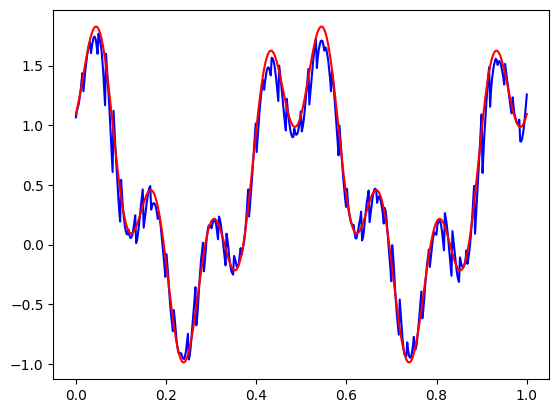

In [39]:
# experiments for bnse with 30  training points
x=np.linspace(0,1,480)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(60):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig_BNSE60")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig_BNSE60')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig_BNSE60')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig_BNSE60')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig_BNSE60')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig_BNSE60")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig_BNSE60')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig_BNSE60')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig_BNSE60')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig_BNSE60')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b")
plt.plot(x,points2, c="r")

2 input dims library
2 input dims library


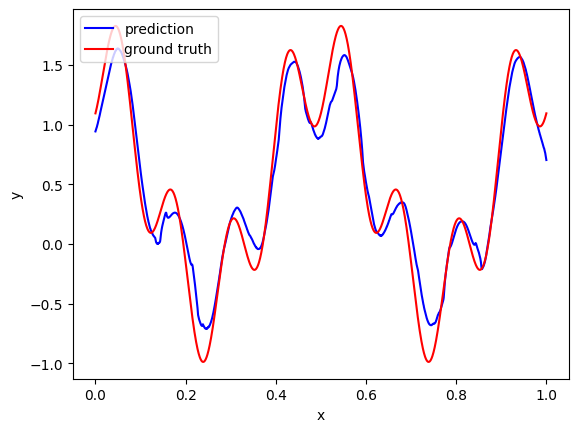

In [90]:
# the model receives as input (x, f_l(x))
# custom kernel
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

x=np.linspace(0,1,1600)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
input=[]
for i, k in zip(x, points1):
    input.append([i,k])
    
x_train_real = torch.tensor(np.asarray(input))
model=mogptk.LoadModel("m1_r_sin_one_point")
_,real, _,_=model.predict(x_train_real)
plt.plot(x, real, label="prediction", c="b")
plt.plot(x, points2, label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("one_point_custom.jpeg")

In [91]:
calc_rmse(np.asarray(real), np.asarray(points2))

0.1821409011099736

2 input dims library
2 input dims library


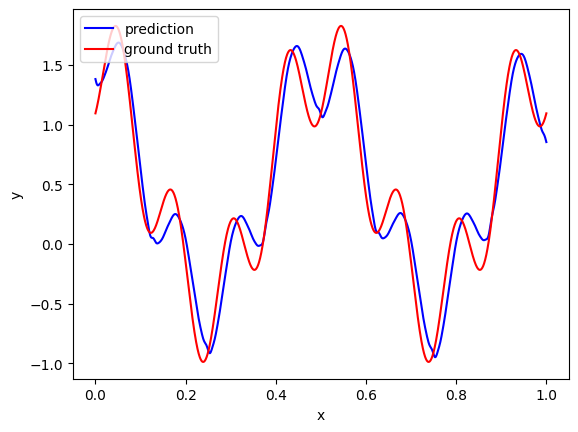

In [92]:
# the model receives as input (x, f_l(x))
# sm kernel

def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

x=np.linspace(0,1,1600)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
input=[]
for i, k in zip(x, points1):
    input.append([i,k])
    
x_train_real = torch.tensor(np.asarray(input))
model=mogptk.LoadModel("m1_r_sin_sm_orig_one_point")
_,real, _,_=model.predict(x_train_real)
plt.plot(x, real, label="prediction", c="b")
plt.plot(x, points2, label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("one_point_sm.jpeg")

In [93]:
calc_rmse(np.asarray(real), np.asarray(points2))

0.19993681167135968

3 input dims library
3 input dims library


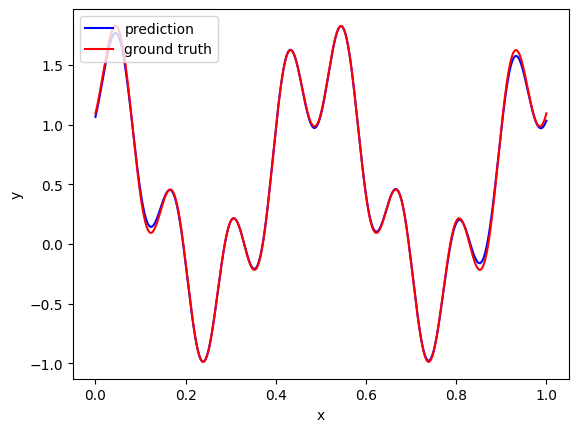

In [94]:
# model receives as input (x, f_l(x))
#sm + bnse

def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

x=np.linspace(0,1,1600)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
input=[]
for i, k in zip(x, points1):
    input.append([i,k])
    
x_train_real = torch.tensor(np.asarray(input))
model=mogptk.LoadModel("m1_r_sin_sm_bnse_one_point")
_,real, _,_=model.predict(x_train_real)
plt.plot(x, real, label="prediction", c="b")
plt.plot(x, points2, label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("one_point_sm_bnse.jpeg")

In [95]:
calc_rmse(np.asarray(real), np.asarray(points2))

0.02320045874315778

In [6]:
#custom kernel + frequencies
# gathering Fourier coefficients
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

x=np.linspace(0,1,1600)

points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]

f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []

probe_x=[]
probe_x2=[]
for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

    probe_x.append(points[i][0])
    probe_x2.append(points[i][1])
    
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin")
m2_real = mogptk.LoadModel('m2_r_sin')
m3_real = mogptk.LoadModel('m3_r_sin')
m4_real = mogptk.LoadModel('m4_r_sin')
m5_real = mogptk.LoadModel('m5_r_sin')
 

m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin')
m3_im = mogptk.LoadModel('m3_i_sin')
m4_im = mogptk.LoadModel('m4_i_sin')
m5_im = mogptk.LoadModel('m5_i_sin')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []

probe_points=[]
probe_points2r=[]
probe_points2i=[]
probe_points5r=[]
probe_points5i=[]
for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
        probe_points.append(r)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
        probe_points2r.append(r)
        probe_points2i.append(im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)
        probe_points5r.append(r)
        probe_points5i.append(im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()

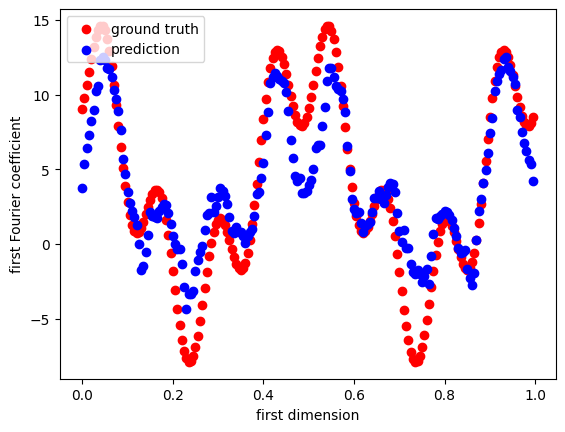

In [7]:
#plot optimised function, first frequency
# on the x axis is the first component of the input x_1
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[0].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[0].imag)

plt.scatter(first_point, (first_freq_real),c="r", label="ground truth")
plt.scatter(first_point, probe_points, c="b", label="prediction")
plt.xlabel("first dimension")
plt.ylabel("first Fourier coefficient")
plt.legend(loc="upper left")
plt.savefig("first_freq_custom.jpeg")

In [9]:
#plot optimised function, second real frequency component
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[1].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[1].imag)

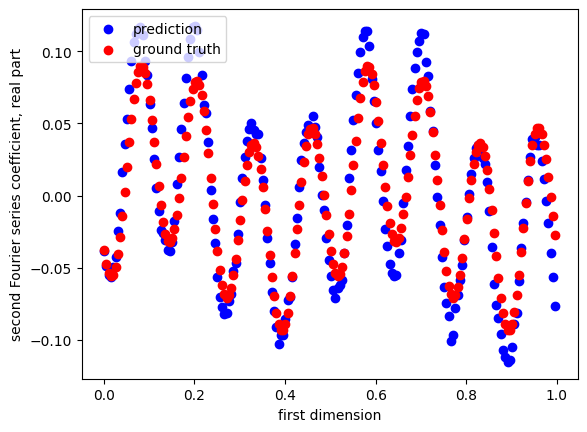

In [10]:
plt.scatter(probe_x2, probe_points2r, c="b", label="prediction")
plt.scatter(probe_x2, first_freq_real, c="r", label="ground truth")
plt.xlabel("first dimension")
plt.ylabel("second Fourier series coefficient, real part")
plt.legend(loc="upper left")
plt.savefig("second_freq_custom_real.jpeg")

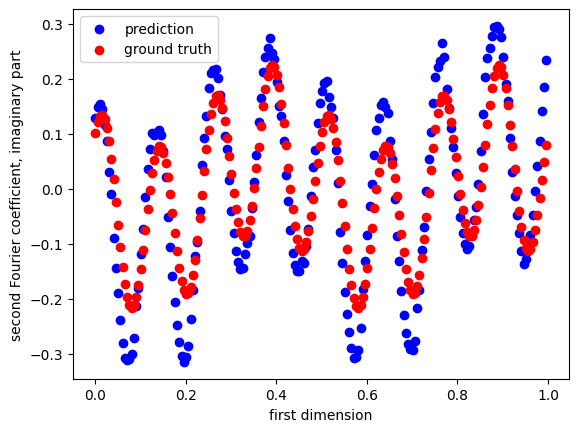

In [11]:
# second imaginary frequency component
plt.scatter(probe_x2, probe_points2i,c="b", label="prediction")
plt.scatter(probe_x2,first_freq_imag, c="r", label="ground truth")
plt.xlabel("first dimension")
plt.ylabel("second Fourier coefficient, imaginary part")
plt.legend(loc="upper left")
plt.savefig("second_freq_custom_imag.jpeg")

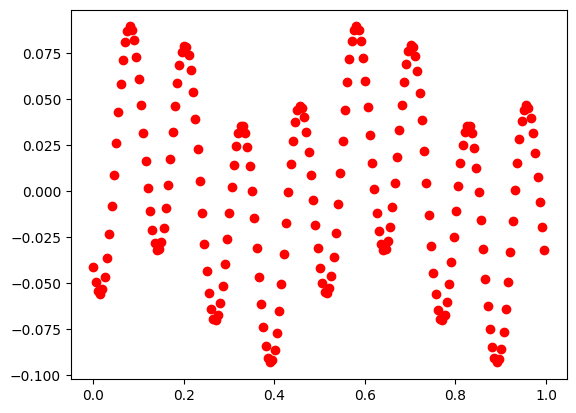

In [12]:
#plot optimised function, first frequency
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[4].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[4].imag)
    
plt.scatter(probe_x2, first_freq_real, c="r", label="ground truth")

18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
18 input dims library
tensor([[1.7708],
        [1.8593],
        [1.6655],
        [1.7659],
        [1.4181],
        [1.4413],
        [1.2235],
        [1.1530],
        [0.9174],
        [0.8901]], dtype=torch.float64) real variance
18 input dims library
tensor([[1.5508],
        [1.6454],
        [1.4767],
        [1.5679],
        [1.2461],
        [1.2859],
        [1.0808],
        [0.9997],
        [0.8091],
        [0.7807]], dtype=torch.float64) real variance2
18 input dims library
18 input dims library
18 input dims library
18 input dims lib

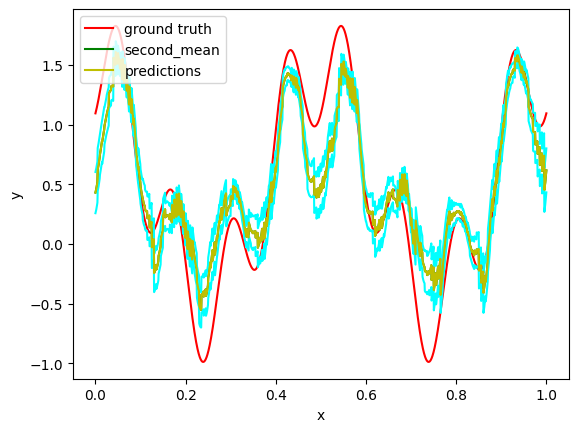

In [66]:
#tests with calculation of variancr
from calc_var import calculate_variance, calculate_mean

f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin")
m2_real = mogptk.LoadModel('m2_r_sin')
m3_real = mogptk.LoadModel('m3_r_sin')
m4_real = mogptk.LoadModel('m4_r_sin')
m5_real = mogptk.LoadModel('m5_r_sin')
 

m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin')
m3_im = mogptk.LoadModel('m3_i_sin')
m4_im = mogptk.LoadModel('m4_i_sin')
m5_im = mogptk.LoadModel('m5_i_sin')
 
 
_, real, u1_r, l1_r = m1_real.predict(x_train_real)
_, real2, u2_r, l2_r = m2_real.predict(x_train_real)
_, real3, u3_r, l3_r = m3_real.predict(x_train_real)
_, real4, u4_r, l4_r = m4_real.predict(x_train_real)
_, real5, u5_r, l5_r = m5_real.predict(x_train_real)


_, im, u1_i, l1_i = m1_im.predict(x_train_real)
_, im2,u2_i, l2_i = m2_im.predict(x_train_real)
_, im3, u3_i, l3_i = m3_im.predict(x_train_real)
_, im4, u4_i, l4_i = m4_im.predict(x_train_real)
_, im5, u5_i, l5_i = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()

#real,sigma = m1_real.gpr.predict_f(x_train_real)

#real2, sigma2 = m2_real.gpr.predict_f(x_train_real)
#real3,sigma3 = m3_real.gpr.predict_f(x_train_real)
#real4,sigma4 = m4_real.gpr.predict_f(x_train_real)
#real5, sigma5 = m5_real.gpr.predict_f(x_train_real)


#im, sigma_im = m1_im.gpr.predict_f(x_train_real)
#im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real)
#im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real)
#im4, sigma_im4= m4_im.gpr.predict_f(x_train_real)
#im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real)

X = m1_real.dataset._format_X(x_train_real)
x_train_real1 =m1_real._to_kernel_format(X)
real,sigma = m1_real.gpr.predict_f(x_train_real1)
print(sigma[50:60], "real variance")
X = m2_real.dataset._format_X(x_train_real)
x_train_real3 =m2_real._to_kernel_format(X)
real2, sigma2 = m2_real.gpr.predict_f(x_train_real3)
print(sigma2[50:60], "real variance2")
X = m3_real.dataset._format_X(x_train_real)
x_train_real4 =m3_real._to_kernel_format(X)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real4)

X = m4_real.dataset._format_X(x_train_real)
x_train_real5 =m4_real._to_kernel_format(X)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real5)

X = m5_real.dataset._format_X(x_train_real)
x_train_real6 =m5_real._to_kernel_format(X)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real6)

X = m1_im.dataset._format_X(x_train_real)
x_train_real2 =m1_im._to_kernel_format(X)
im, sigma_im = m1_im.gpr.predict_f(x_train_real2)

X = m2_im.dataset._format_X(x_train_real)
x_train_real7 =m2_im._to_kernel_format(X)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real7)

X = m3_im.dataset._format_X(x_train_real)
x_train_real8 =m3_im._to_kernel_format(X)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real8)

X = m4_im.dataset._format_X(x_train_real)
x_train_real9 =m4_im._to_kernel_format(X)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real9)

X = m5_im.dataset._format_X(x_train_real)
x_train_real10 =m5_im._to_kernel_format(X)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real10)



real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]

real_mean=[real.numpy(), real2.numpy(), real3.numpy(), real4.numpy(), real5.numpy()]
imag_mean=[im.numpy(), im2.numpy(), im3.numpy(), im4.numpy(), im5.numpy()]


variances=[]
means=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        
        local_r_mean=[real_mean[0][counter][0], real_mean[1][counter][0], real_mean[2][counter][0], real_mean[3][counter][0], real_mean[4][counter][0]]
        local_i_mean=[imag_mean[0][counter][0], imag_mean[1][counter][0], imag_mean[2][counter][0], imag_mean[3][counter][0],imag_mean[4][counter][0] ]
        
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
                mean=calculate_mean(i, local_r_mean, local_i_mean, 8)
                variances.append(variance)
                means.append(mean)

for i in range(len(variances)):
        variance_upper.append(values_kernel[i]+variances[i]/2)
        variance_lower.append(values_kernel[i]-variances[i]/2)

#plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, means, c="g", label="second_mean")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
plt.plot(x, values_kernel, c="y", label="predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
#plt.savefig("var_custom.jpeg")

8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
tensor([[0.4448],
        [0.3797],
        [0.3365],
        [0.3130],
        [0.2954],
        [0.2876],
        [0.2797],
        [0.2778],
        [0.2737],
        [0.2740]], dtype=torch.float64) first sigma
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library


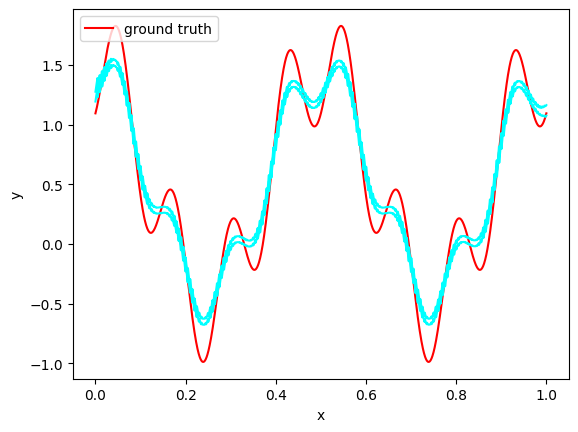

In [69]:
#reference function without frequencies
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_orig")
m2_real = mogptk.LoadModel('m2_r_sin_orig')
m3_real = mogptk.LoadModel('m3_r_sin_orig')
m4_real = mogptk.LoadModel('m4_r_sin_orig')
m5_real = mogptk.LoadModel('m5_r_sin_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_orig")
m2_im = mogptk.LoadModel('m2_i_sin_orig')
m3_im = mogptk.LoadModel('m3_i_sin_orig')
m4_im = mogptk.LoadModel('m4_i_sin_orig')
m5_im = mogptk.LoadModel('m5_i_sin_orig')
 
 
_, real, u11_r, l11_r = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()

#real,sigma = m1_real.gpr.predict_f(x_train_real)

#real2, sigma2 = m2_real.gpr.predict_f(x_train_real)
#real3,sigma3 = m3_real.gpr.predict_f(x_train_real)
#real4,sigma4 = m4_real.gpr.predict_f(x_train_real)
#real5, sigma5 = m5_real.gpr.predict_f(x_train_real)


#im, sigma_im = m1_im.gpr.predict_f(x_train_real)
#im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real)
#im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real)
#im4, sigma_im4= m4_im.gpr.predict_f(x_train_real)
#im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real)


X = m1_real.dataset._format_X(x_train_real)
x_train_real1 =m1_real._to_kernel_format(X)
real,sigma = m1_real.gpr.predict_f(x_train_real1)
print(sigma[:10], "first sigma")
X = m2_real.dataset._format_X(x_train_real)
x_train_real3 =m2_real._to_kernel_format(X)
real2, sigma2 = m2_real.gpr.predict_f(x_train_real3)

X = m3_real.dataset._format_X(x_train_real)
x_train_real4 =m3_real._to_kernel_format(X)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real4)

X = m4_real.dataset._format_X(x_train_real)
x_train_real5 =m4_real._to_kernel_format(X)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real5)

X = m5_real.dataset._format_X(x_train_real)
x_train_real6 =m5_real._to_kernel_format(X)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real6)

X = m1_im.dataset._format_X(x_train_real)
x_train_real2 =m1_im._to_kernel_format(X)
im, sigma_im = m1_im.gpr.predict_f(x_train_real2)

X = m2_im.dataset._format_X(x_train_real)
x_train_real7 =m2_im._to_kernel_format(X)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real7)

X = m3_im.dataset._format_X(x_train_real)
x_train_real8 =m3_im._to_kernel_format(X)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real8)

X = m4_im.dataset._format_X(x_train_real)
x_train_real9 =m4_im._to_kernel_format(X)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real9)

X = m5_im.dataset._format_X(x_train_real)
x_train_real10 =m5_im._to_kernel_format(X)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real10)

real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]

real_mean=[real.numpy(), real2.numpy(), real3.numpy(), real4.numpy(), real5.numpy()]
imag_mean=[im.numpy(), im2.numpy(), im3.numpy(), im4.numpy(), im5.numpy()]


variances=[]
means=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        
        local_r_mean=[real_mean[0][counter][0], real_mean[1][counter][0], real_mean[2][counter][0], real_mean[3][counter][0], real_mean[4][counter][0]]
        local_i_mean=[imag_mean[0][counter][0], imag_mean[1][counter][0], imag_mean[2][counter][0], imag_mean[3][counter][0],imag_mean[4][counter][0] ]
        
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
                mean=calculate_mean(i, local_r_mean, local_i_mean, 8)
                variances.append(variance)
                means.append(mean)

for i in range(len(variances)):
        variance_upper.append(values[i]+variances[i]/2)
        variance_lower.append(values[i]-variances[i]/2)


plt.xlabel("x")
plt.ylabel("y")
#plt.plot(x, values, c="g", label="without frequencies")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
#plt.plot(x, values_kernel, c="b", label="with frequencies")
plt.legend(loc="upper left")
 
#what are the most important of inputs for th

8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
9 input dims library
9 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library
torch.Size([200, 8]) shape
8 input
8 input dims library
tensor([[-109.3458],
        [-109.4438],
        [-109.5187],
        [-109.5748],
        [-109.6156],
        [-109.6445],
        [-109.6640],
        [-109.6767],
        [-109.6843],
        [-109.6885]], dtype=torch.float64) first sigma
8 input dims library
8 input dims library
8 input dims library
8 input dims library
9 input dims library
8 input dims library
8 input dims library
8 input dims library
8 input dims library


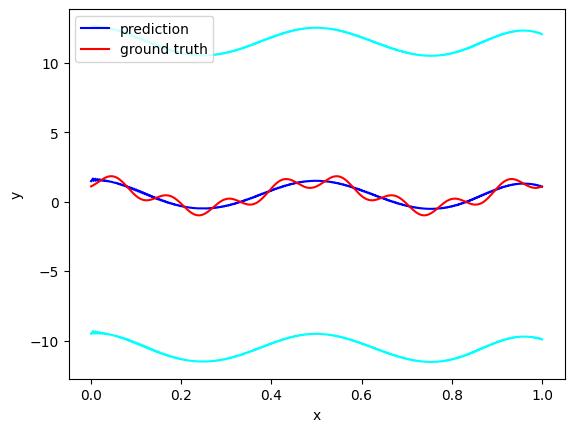

In [70]:
# sm with no frequencies
from calc_var import calculate_variance, calculate_mean
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig')
 
  
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
print(x_train_real.shape, "shape")
print(m1_real.gpr.input_dims, "input")
X = m1_real.dataset._format_X(x_train_real)
x_train_real =m1_real._to_kernel_format(X)


real,sigma = m1_real.gpr.predict_f(x_train_real)
print(sigma[:10], "first sigma")
real2, sigma2 = m2_real.gpr.predict_f(x_train_real)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real)

X = m1_im.dataset._format_X(x_train_real)
x_train_real2 =m1_im._to_kernel_format(X)
im, sigma_im = m1_im.gpr.predict_f(x_train_real2)

X = m2_im.dataset._format_X(x_train_real)
x_train_real =m2_im._to_kernel_format(X)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real)


real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]




variances=[]
means=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        
        
 
        
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
               
                variances.append(variance)
           
            

       

for i in range(len(variances)):
        variance_upper.append(values[i]+variances[i]/2)
        variance_lower.append(values[i]-variances[i]/2)




plt.plot(x, values, c="b",label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
#plt.savefig("sm_no_freq.jpeg")

16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
17 input dims library
17 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
torch.Size([200, 16]) shape
16 input
16 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library
17 input dims library
16 input dims library
16 input dims library
16 input dims library
16 input dims library


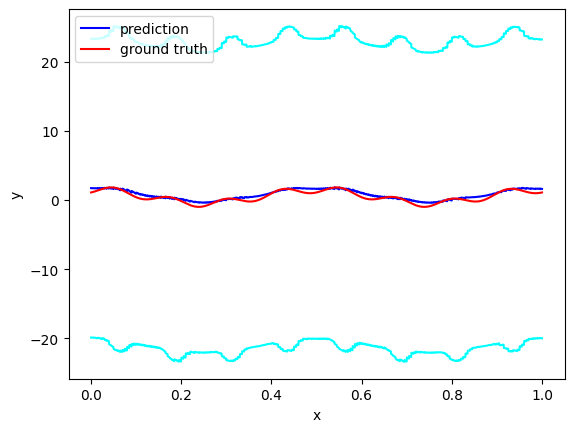

In [45]:
# sm with no frequencies
from calc_var import calculate_variance, calculate_mean
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm")
m2_real = mogptk.LoadModel('m2_r_sin_sm')
m3_real = mogptk.LoadModel('m3_r_sin_sm')
m4_real = mogptk.LoadModel('m4_r_sin_sm')
m5_real = mogptk.LoadModel('m5_r_sin_sm')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm")
m2_im = mogptk.LoadModel('m2_i_sin_sm')
m3_im = mogptk.LoadModel('m3_i_sin_sm')
m4_im = mogptk.LoadModel('m4_i_sin_sm')
m5_im = mogptk.LoadModel('m5_i_sin_sm')
 
  
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
print(x_train_real.shape, "shape")
print(m1_real.gpr.input_dims, "input")
X = m1_real.dataset._format_X(x_train_real)
x_train_real =m1_real._to_kernel_format(X)


real,sigma = m1_real.gpr.predict_f(x_train_real)
real2, sigma2 = m2_real.gpr.predict_f(x_train_real)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real)

X = m1_im.dataset._format_X(x_train_real)
x_train_real2 =m1_im._to_kernel_format(X)
im, sigma_im = m1_im.gpr.predict_f(x_train_real2)

X = m2_im.dataset._format_X(x_train_real)
x_train_real =m2_im._to_kernel_format(X)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real)


real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]




variances=[]
means=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        
        
 
        
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
               
                variances.append(variance)
           
            

       

for i in range(len(variances)):
        variance_upper.append(values[i]+variances[i]/2)
        variance_lower.append(values[i]-variances[i]/2)




plt.plot(x, values, c="b",label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")

17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
torch.Size([200, 16]) shape
17 input
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library


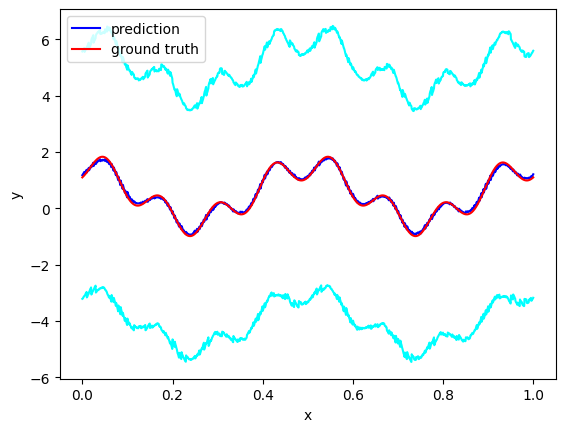

In [49]:
#variance bnse
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))


m1_real = mogptk.LoadModel("m1_r_sin_sm_bnse3")
m2_real = mogptk.LoadModel('m2_r_sin_sm_bnse3')
m3_real = mogptk.LoadModel('m3_r_sin_sm_bnse3')
m4_real = mogptk.LoadModel('m4_r_sin_sm_bnse3')
m5_real = mogptk.LoadModel('m5_r_sin_sm_bnse3')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_bnse3")
m2_im = mogptk.LoadModel('m2_i_sin_sm_bnse3')
m3_im = mogptk.LoadModel('m3_i_sin_sm_bnse3')
m4_im = mogptk.LoadModel('m4_i_sin_sm_bnse3')
m5_im = mogptk.LoadModel('m5_i_sin_sm_bnse3')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()

print(x_train_real.shape, "shape")
print(m1_real.gpr.input_dims, "input")
X = m1_real.dataset._format_X(x_train_real)
x_train_real1 =m1_real._to_kernel_format(X)
real,sigma = m1_real.gpr.predict_f(x_train_real1)

X = m2_real.dataset._format_X(x_train_real)
x_train_real3 =m2_real._to_kernel_format(X)
real2, sigma2 = m2_real.gpr.predict_f(x_train_real3)

X = m3_real.dataset._format_X(x_train_real)
x_train_real4 =m3_real._to_kernel_format(X)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real4)

X = m4_real.dataset._format_X(x_train_real)
x_train_real5 =m4_real._to_kernel_format(X)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real5)

X = m5_real.dataset._format_X(x_train_real)
x_train_real6 =m5_real._to_kernel_format(X)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real6)

X = m1_im.dataset._format_X(x_train_real)
x_train_real2 =m1_im._to_kernel_format(X)
im, sigma_im = m1_im.gpr.predict_f(x_train_real2)

X = m2_im.dataset._format_X(x_train_real)
x_train_real7 =m2_im._to_kernel_format(X)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real7)

X = m3_im.dataset._format_X(x_train_real)
x_train_real8 =m3_im._to_kernel_format(X)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real8)

X = m4_im.dataset._format_X(x_train_real)
x_train_real9 =m4_im._to_kernel_format(X)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real9)

X = m5_im.dataset._format_X(x_train_real)
x_train_real10 =m5_im._to_kernel_format(X)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real10)


real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]




variances=[]
means=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        
        
 
        
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
               
                variances.append(variance)
           
            

       

for i in range(len(variances)):
        variance_upper.append(values[i]+variances[i]/2)
        variance_lower.append(values[i]-variances[i]/2)


plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")


In [52]:
for i in range(15):
    print(variances[i])

-8.780097096634474
-8.796637185818447
-8.813402520059377
-8.796637185818447
-8.780097096634474
-8.796637185818447
-8.813402520059377
-8.796637185818447
-8.65268570366866
-8.66904413293394
-8.685603309070451
-8.66904413293394
-8.65268570366866
-8.66904413293394
-8.685603309070451


17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library


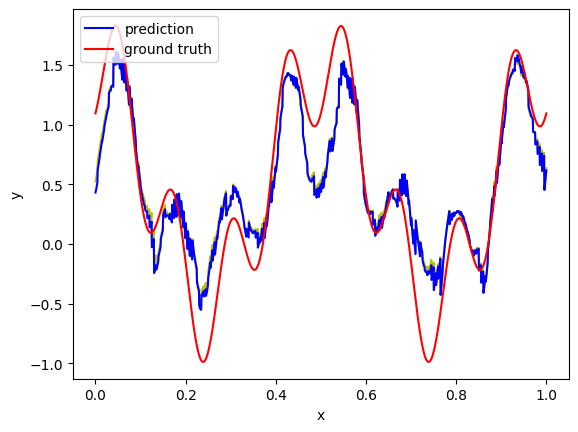

In [36]:
#variance custom kernel
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]
    index=0
    for k in value1:
        real_train.append(k.real)
        
        if index!=0:
            real_train.append(k.imag)
        index+=1
        
       # real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_detr")
m2_real = mogptk.LoadModel('m2_r_sin_detr')
m3_real = mogptk.LoadModel('m3_r_sin_detr')
m4_real = mogptk.LoadModel('m4_r_sin_detr')
m5_real = mogptk.LoadModel('m5_r_sin_detr')
 

#m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin_detr')
m3_im = mogptk.LoadModel('m3_i_sin_detr')
m4_im = mogptk.LoadModel('m4_i_sin_detr')
m5_im = mogptk.LoadModel('m5_i_sin_detr')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


#_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r in real:
        first.append(r)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()

#plt.plot(x, values_kernel, c="b", label="prediction")
plt.plot(x, values, c="y")
plt.plot(x, values_kernel, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
#plt.savefig("custom_kernel_freq.jpeg")

17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
torch.Size([200, 16]) shape
17 input
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library
17 input dims library


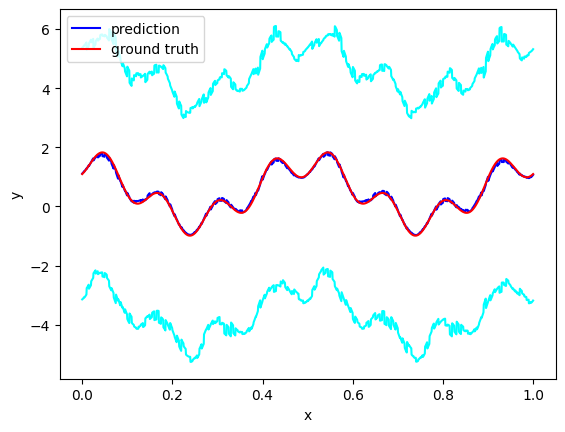

In [53]:
# variance bnse 

f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))


m1_real = mogptk.LoadModel("m1_r_sin_sm_more")
m2_real = mogptk.LoadModel('m2_r_sin_sm_more')
m3_real = mogptk.LoadModel('m3_r_sin_sm_more')
m4_real = mogptk.LoadModel('m4_r_sin_sm_more')
m5_real = mogptk.LoadModel('m5_r_sin_sm_more')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_more")
m2_im = mogptk.LoadModel('m2_i_sin_sm_more')
m3_im = mogptk.LoadModel('m3_i_sin_sm_more')
m4_im = mogptk.LoadModel('m4_i_sin_sm_more')
m5_im = mogptk.LoadModel('m5_i_sin_sm_more')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()

print(x_train_real.shape, "shape")
print(m1_real.gpr.input_dims, "input")
X = m1_real.dataset._format_X(x_train_real)
x_train_real1 =m1_real._to_kernel_format(X)
real,sigma = m1_real.gpr.predict_f(x_train_real1)

X = m2_real.dataset._format_X(x_train_real)
x_train_real3 =m2_real._to_kernel_format(X)
real2, sigma2 = m2_real.gpr.predict_f(x_train_real3)

X = m3_real.dataset._format_X(x_train_real)
x_train_real4 =m3_real._to_kernel_format(X)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real4)

X = m4_real.dataset._format_X(x_train_real)
x_train_real5 =m4_real._to_kernel_format(X)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real5)

X = m5_real.dataset._format_X(x_train_real)
x_train_real6 =m5_real._to_kernel_format(X)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real6)

X = m1_im.dataset._format_X(x_train_real)
x_train_real2 =m1_im._to_kernel_format(X)
im, sigma_im = m1_im.gpr.predict_f(x_train_real2)

X = m2_im.dataset._format_X(x_train_real)
x_train_real7 =m2_im._to_kernel_format(X)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real7)

X = m3_im.dataset._format_X(x_train_real)
x_train_real8 =m3_im._to_kernel_format(X)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real8)

X = m4_im.dataset._format_X(x_train_real)
x_train_real9 =m4_im._to_kernel_format(X)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real9)

X = m5_im.dataset._format_X(x_train_real)
x_train_real10 =m5_im._to_kernel_format(X)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real10)


real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]




variances=[]
means=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        
        
 
        
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
               
                variances.append(variance)
           
            

       

for i in range(len(variances)):
        variance_upper.append(values[i]+variances[i]/2)
        variance_lower.append(values[i]-variances[i]/2)


plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")